In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
data = pd.read_csv('/content/drive/MyDrive/SapOutside/IOT-temp.csv',  parse_dates=["noted_date"], dayfirst=True)


C:\Users\asifk\AppData\Local\Temp\ipykernel_8\2598993840.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'plotly'

In [64]:
print(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          97606 non-null  object        
 1   room_id/id  97606 non-null  object        
 2   noted_date  97606 non-null  datetime64[ns]
 3   temp        97606 non-null  int64         
 4   out/in      97606 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.7+ MB
None


,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,2018-12-08 09:30:00,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-12-08 09:30:00,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,2018-12-08 09:29:00,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,2018-12-08 09:29:00,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-12-08 09:29:00,31,In


In [65]:
# Dropping unnecessary columns of id and room_id (always admin room as the dataset is of 1 room)
data = data.drop(columns=["id", "room_id/id"], errors="ignore")
display(data.head())
data.info()

,noted_date,temp,out/in
0,2018-12-08 09:30:00,29,In
1,2018-12-08 09:30:00,29,In
2,2018-12-08 09:29:00,41,Out
3,2018-12-08 09:29:00,41,Out
4,2018-12-08 09:29:00,31,In


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   noted_date  97606 non-null  datetime64[ns]
 1   temp        97606 non-null  int64         
 2   out/in      97606 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.2+ MB


NO null data in the dataset and look it has multiple values duplicate as the data above

---


0	08-12-2018 09:30	29	In

---


1	08-12-2018 09:30	29	In

In [66]:
data = data.sort_values(by=["noted_date"]).reset_index(drop=True)
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print(f'Number of duplicates: {num_duplicates}')

Number of duplicates: 60338


In [67]:
duplicates.value_counts()

True     60338
False    37268
Name: count, dtype: int64

In [68]:
data_cleaned = data.drop_duplicates()
print(f'Number of rows after deleting duplicates: {data_cleaned.shape[0]}')

Number of rows after deleting duplicates: 37268


In [69]:
display(data_cleaned.head())

,noted_date,temp,out/in
0,2018-07-28 07:06:00,31,In
3,2018-07-28 07:07:00,31,In
6,2018-07-28 07:07:00,32,Out
30,2018-07-28 07:08:00,31,In
34,2018-07-28 07:08:00,31,Out


In [70]:
#Pivoting the table
data_cleaned_pivoted = data_cleaned.pivot(index="noted_date", columns="out/in", values="temp")

ValueError: Index contains duplicate entries, cannot reshape

In [71]:
data_cleaned.duplicated().value_counts()

False    37268
Name: count, dtype: int64

In [72]:
# can not pivoting, maybe we need to averaging the duplicate values
data_cleaned = data_cleaned.groupby(["noted_date", "out/in"])["temp"].agg("mean").reset_index()

In [73]:
#Pivoting the table
data_cleaned_pivoted = data_cleaned.pivot(index="noted_date", columns="out/in", values="temp")
display(data_cleaned_pivoted.head())

out/in,In,Out
noted_date,,
2018-07-28 07:06:00,31.0,NaN
2018-07-28 07:07:00,31.0,32.0
2018-07-28 07:08:00,31.0,31.0
2018-07-28 07:09:00,NaN,32.5
2018-07-28 07:10:00,31.0,NaN


In [74]:
# Ensure the index is a DatetimeIndex
data_cleaned_pivoted.index = pd.to_datetime(data_cleaned_pivoted.index)
#Resampling in 1Hour, 1Day, 1Month
data_hourly_df = data_cleaned_pivoted.resample("1H").mean()
data_daily_df = data_hourly_df.resample("1D").mean()
data_monthly_df = data_daily_df.resample("1M").mean()

In [77]:
display(data_hourly_df.head())
display(data_daily_df.head())
display(data_monthly_df.head())

out/in,In,Out
noted_date,,
2018-07-28 07:00:00,31.0,31.733333
2018-07-28 08:00:00,NaN,NaN
2018-07-28 09:00:00,NaN,NaN
2018-07-28 10:00:00,NaN,NaN
2018-07-28 11:00:00,NaN,NaN


out/in,In,Out
noted_date,,
2018-07-28,31.000000,31.733333
2018-07-29,32.500000,31.333333
2018-07-30,NaN,NaN
2018-07-31,30.833333,32.395833
2018-08-01,NaN,NaN


out/in,In,Out
noted_date,,
2018-07-31,31.444444,31.820833
2018-08-31,31.186908,31.242821
2018-09-30,31.060631,37.206693
2018-10-31,32.182055,44.177703
2018-11-30,30.337292,41.065819


In [83]:
#Distribution of Temperatures
fig = go.Figure()

fig.add_trace(go.Histogram(x=data_hourly_df["In"], name="Inside Temperature"))
fig.add_trace(go.Histogram(x=data_hourly_df["Out"], name="Outside Temperature"))

fig.update_layout(
    xaxis_title="Temperature (°C)",
    yaxis_title="Count",
    title="<b>Distribution of Hourly Inside and Outside Temperature</b>",
    barmode='overlay'
)

fig.update_traces(opacity=0.75)
fig.show()


In [84]:
#Scatter Plot of Inside vs Outside Temperature
fig = px.scatter(
    x=data_hourly_df["Out"],
    y=data_hourly_df["In"],
    labels={"x": "Outside Temperature (°C)", "y": "Inside Temperature (°C)"},
    title="Scatter Plot of Inside vs Outside Temperature"
)
fig.show()


In [86]:
#Time Series Analysis - Temperature Over Time
fig = px.line(data_cleaned_pivoted,
              x=data_cleaned_pivoted.index,
              y=['In', 'Out'],
              labels={'value': 'Temperature (°C)', 'variable': 'Location'},
              title='Temperature Over Time')
fig.show()


In [82]:
#Visualizing data
def plot_temperature(df, x_axis, y_axis, columns, plot_title):
    fig = go.Figure()

    for column in columns:
        fig.add_trace(go.Scatter(
            name=column,
            x=df.index,
            y=df[column]
        ))

    fig.update_layout(
        title=f"<b>{plot_title}</b>",
        xaxis_title=x_axis,
        yaxis_title=y_axis
    )

    fig.show()

plot_temperature(
    df=data_hourly_df,
    x_axis="noted_date",
    y_axis="Temperature (°C)",
    columns=["In", "Out"],
    plot_title="Comparing Hourly Inside and Outside Temperature"
)

plot_temperature(
    df=data_daily_df,
    x_axis="noted_date",
    y_axis="Temperature (°C)",
    columns=["In", "Out"],
    plot_title="Comparing Monthly Inside and Outside Temperature"
)
plot_temperature(
    df=data_monthly_df,
    x_axis="noted_date",
    y_axis="Temperature (°C)",
    columns=["In", "Out"],
    plot_title="Comparing Monthly Inside and Outside Temperature"
)


Correlation Analysis

In [87]:
# Calculate the correlation
correlation = data_hourly_df.corr()
print("Correlation between inside and outside temperatures (hourly):")
print(correlation)

Correlation between inside and outside temperatures (hourly):
out/in        In       Out
out/in                    
In      1.000000  0.399373
Out     0.399373  1.000000


Regression Analysis


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
#Prepare dataset for Regression

X_filled = pd.DataFrame(X).fillna(method='ffill').values  # Forward fill missing values in X
y_filled = pd.DataFrame(y).fillna(method='ffill').values  # Forward fill missing values in y

X_train, X_test, y_train, y_test = train_test_split(X_filled, y_filled, test_size=0.2, random_state=42)


In [103]:
# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 4.883740292102631


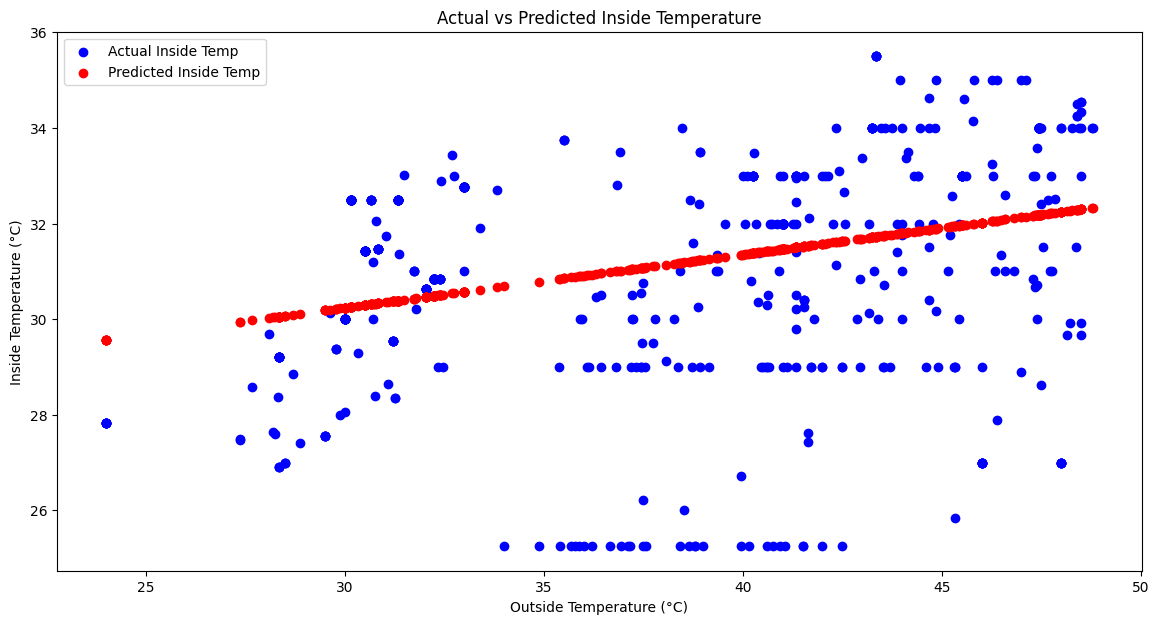

In [105]:
y_pred = model.predict(X_test.reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot regression results
plt.figure(figsize=(14, 7))
plt.scatter(X_test, y_test, color='blue', label='Actual Inside Temp')
plt.scatter(X_test, y_pred, color='red', label='Predicted Inside Temp')
plt.xlabel('Outside Temperature (°C)')
plt.ylabel('Inside Temperature (°C)')
plt.title('Actual vs Predicted Inside Temperature')
plt.legend()
plt.show()

Time Series Analysis


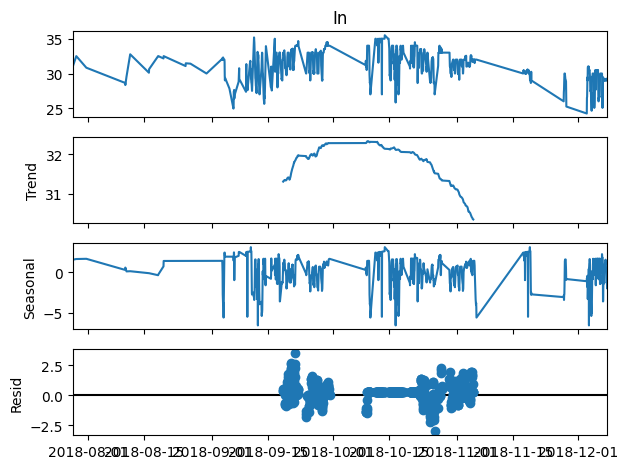

In [106]:
import statsmodels.api as sm

# Decompose the time series to observe trends and seasonality
decomposition = sm.tsa.seasonal_decompose(data_hourly_df['In'].dropna(), model='additive', period=365)
fig = decomposition.plot()
plt.show()